In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from sklearn.preprocessing import LabelEncoder
import warnings

warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("/content/drive/MyDrive/DataMiningProject/Dataset/2020/heart_2020_cleaned.csv")

In [4]:
df.head()

HeartDisease    BMI Smoking AlcoholDrinking Stroke  PhysicalHealth  \
0           No  16.60     Yes              No     No             3.0   
1           No  20.34      No              No    Yes             0.0   
2           No  26.58     Yes              No     No            20.0   
3           No  24.21      No              No     No             0.0   
4           No  23.71      No              No     No            28.0   

   MentalHealth DiffWalking     Sex  AgeCategory   Race Diabetic  \
0          30.0          No  Female        55-59  White      Yes   
1           0.0          No  Female  80 or older  White       No   
2          30.0          No    Male        65-69  White      Yes   
3           0.0          No  Female        75-79  White       No   
4           0.0         Yes  Female        40-44  White       No   

  PhysicalActivity  GenHealth  SleepTime Asthma KidneyDisease SkinCancer  
0              Yes  Very good        5.0    Yes            No        Yes  
1              Yes  Very good        7.0     No            No         No  
2              Yes       Fair        8.0    Yes            No         No  
3               No       Good        6.0     No            No        Yes  
4              Yes  Very good        8.0     No            No         No

In [5]:
df2=df

In [6]:
df.describe()

BMI  PhysicalHealth   MentalHealth      SleepTime
count  319795.000000    319795.00000  319795.000000  319795.000000
mean       28.325399         3.37171       3.898366       7.097075
std         6.356100         7.95085       7.955235       1.436007
min        12.020000         0.00000       0.000000       1.000000
25%        24.030000         0.00000       0.000000       6.000000
50%        27.340000         0.00000       0.000000       7.000000
75%        31.420000         2.00000       3.000000       8.000000
max        94.850000        30.00000      30.000000      24.000000

In [7]:
df.duplicated().sum()

18078

In [8]:
df = df.drop_duplicates()

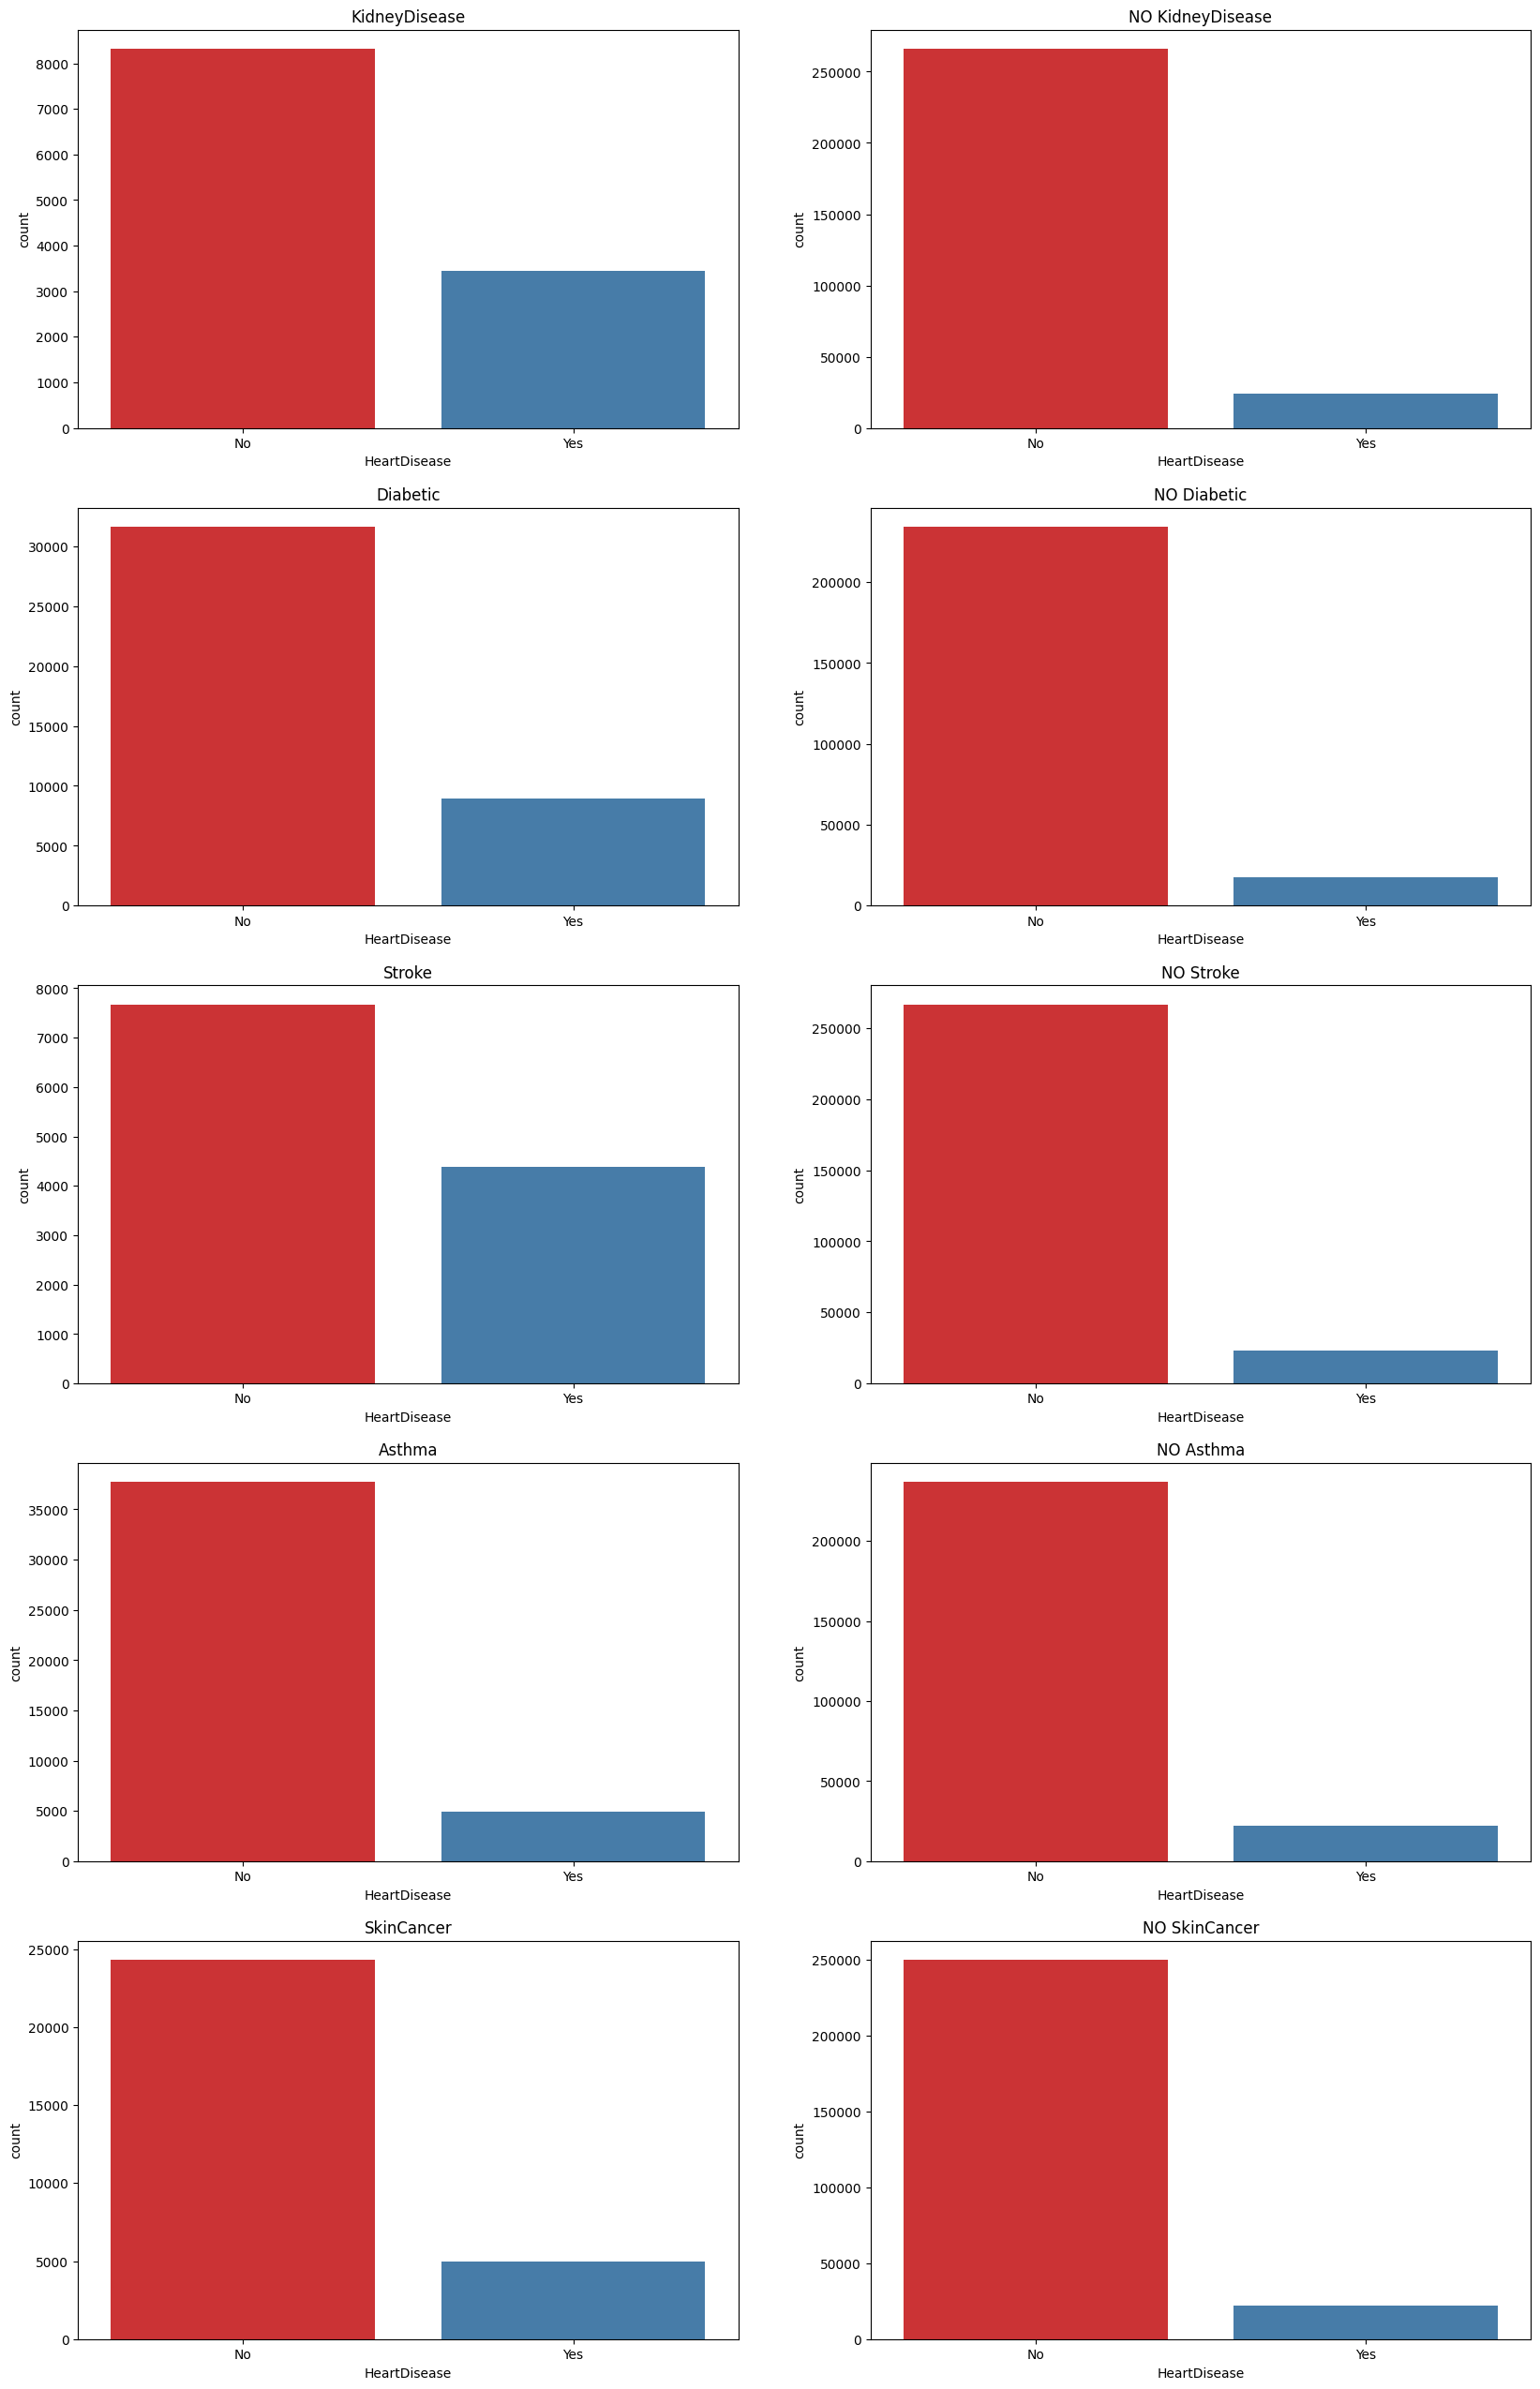

In [9]:
cols = ['KidneyDisease','Diabetic' ,'Stroke' ,'Asthma','SkinCancer']
fig, ax = plt.subplots(5, 2, figsize = (20, 32))
i =0
for col in cols:
    df_yes = df[df[col] == 'Yes']
    df_no = df[df[col] == 'No']

    sns.countplot(data=df_yes, x='HeartDisease', ax = ax[i][0], palette='Set1' ).set_title(col)
    sns.countplot(data=df_no, x='HeartDisease',  ax = ax[i][1], palette='Set1' ).set_title("NO "+col)

    i=i+1
plt.show()

In [10]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
irises_colors = ['rgb(33, 75, 99)', 'rgb(79, 129, 102)', 'rgb(151, 179, 100)',
                 'rgb(175, 49, 35)', 'rgb(36, 73, 147)']
cols = ['Smoking','AlcoholDrinking' ,'PhysicalActivity' ]
for i in cols :
    df_yes = df[df[i] == 'Yes']
    df_no = df[df[i] == 'No']

    fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])

    fig.add_trace(go.Pie(values = df_no.HeartDisease.value_counts().values, labels = [f'No {i}',f'with {i}'],
        marker_colors=irises_colors),row=1,col=1)
    fig.add_trace(go.Pie(values = df_yes.HeartDisease.value_counts().values, labels = [f'No {i}',f'with {i}'],
        marker_colors=irises_colors),row=1,col=2)
    fig.update_layout(legend_title="Labels",
                      annotations=[dict(text=f'No {i}',x=0.15, y=1.10, font_size=30),
                                  dict(text=f'with {i}',x=0.80, y=1.10, font_size=30)],)

    fig.show()

In [11]:
df.head()

HeartDisease    BMI Smoking AlcoholDrinking Stroke  PhysicalHealth  \
0           No  16.60     Yes              No     No             3.0   
1           No  20.34      No              No    Yes             0.0   
2           No  26.58     Yes              No     No            20.0   
3           No  24.21      No              No     No             0.0   
4           No  23.71      No              No     No            28.0   

   MentalHealth DiffWalking     Sex  AgeCategory   Race Diabetic  \
0          30.0          No  Female        55-59  White      Yes   
1           0.0          No  Female  80 or older  White       No   
2          30.0          No    Male        65-69  White      Yes   
3           0.0          No  Female        75-79  White       No   
4           0.0         Yes  Female        40-44  White       No   

  PhysicalActivity  GenHealth  SleepTime Asthma KidneyDisease SkinCancer  
0              Yes  Very good        5.0    Yes            No        Yes  
1              Yes  Very good        7.0     No            No         No  
2              Yes       Fair        8.0    Yes            No         No  
3               No       Good        6.0     No            No        Yes  
4              Yes  Very good        8.0     No            No         No

**Smoking and no physical activity are going to double the chances of getting heart disease**

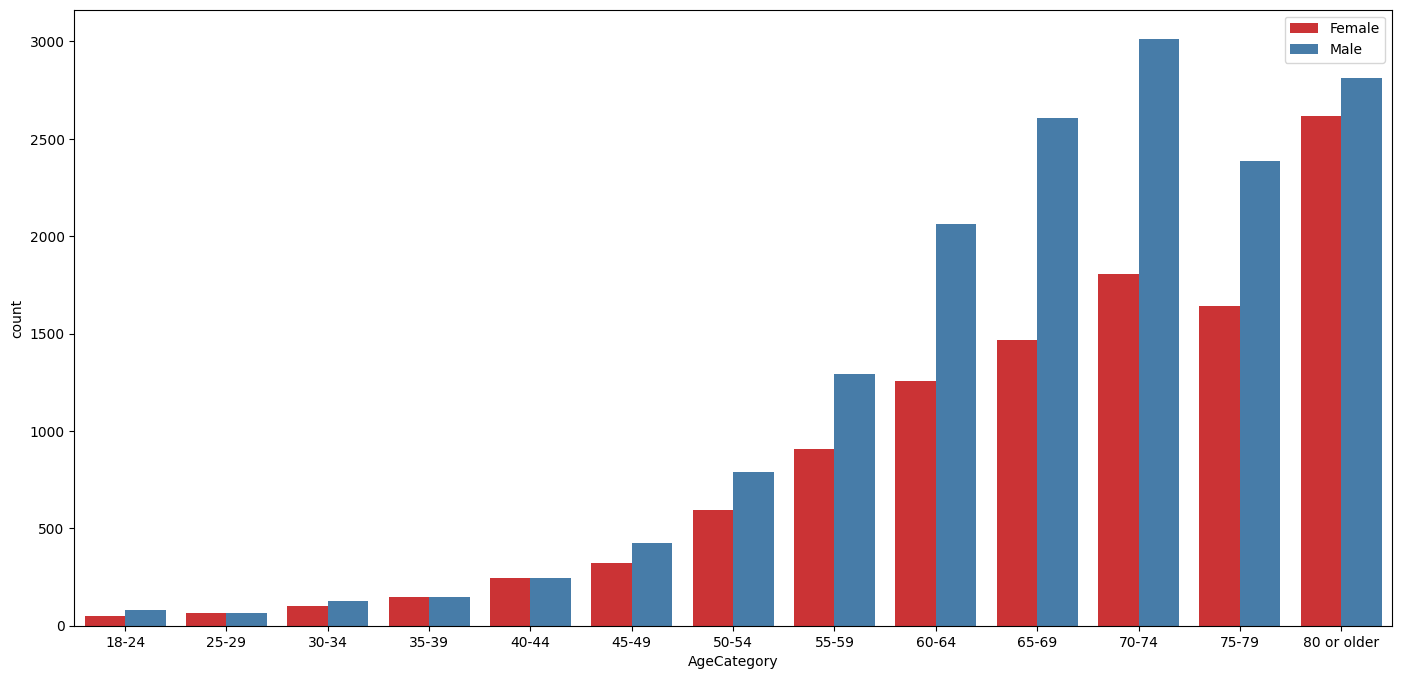

In [12]:
order = pd.unique(df.AgeCategory.values)
order.sort()
plt.figure(figsize = (17,8))
sns.countplot(data=df[df['HeartDisease']=='Yes'], x='AgeCategory', hue='Sex', palette='Set1', order=order)
plt.legend(['Female','Male'])
plt.show()

As people get older, the chances of getting heart disease increase¶
males tendes to get heart disease more than females bold text

<Axes: xlabel='HeartDisease', ylabel='count'>

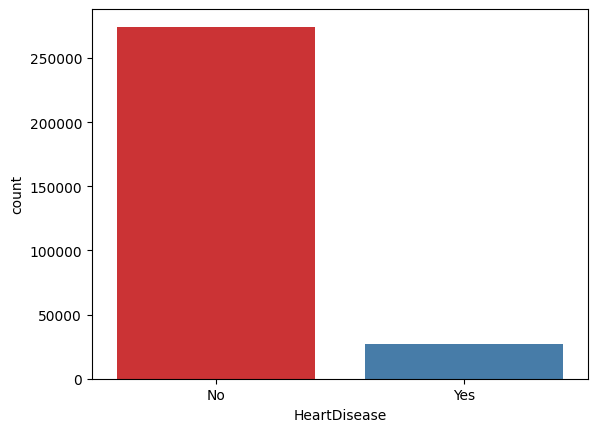

In [13]:
sns.countplot(data=df,x='HeartDisease',palette='Set1')

In [14]:
df2['AgeCategory'] = df2['AgeCategory'].str[:2]

In [15]:
list(df2)

['HeartDisease',
 'BMI',
 'Smoking',
 'AlcoholDrinking',
 'Stroke',
 'PhysicalHealth',
 'MentalHealth',
 'DiffWalking',
 'Sex',
 'AgeCategory',
 'Race',
 'Diabetic',
 'PhysicalActivity',
 'GenHealth',
 'SleepTime',
 'Asthma',
 'KidneyDisease',
 'SkinCancer']

In [16]:
df2.head()

HeartDisease    BMI Smoking AlcoholDrinking Stroke  PhysicalHealth  \
0           No  16.60     Yes              No     No             3.0   
1           No  20.34      No              No    Yes             0.0   
2           No  26.58     Yes              No     No            20.0   
3           No  24.21      No              No     No             0.0   
4           No  23.71      No              No     No            28.0   

   MentalHealth DiffWalking     Sex AgeCategory   Race Diabetic  \
0          30.0          No  Female          55  White      Yes   
1           0.0          No  Female          80  White       No   
2          30.0          No    Male          65  White      Yes   
3           0.0          No  Female          75  White       No   
4           0.0         Yes  Female          40  White       No   

  PhysicalActivity  GenHealth  SleepTime Asthma KidneyDisease SkinCancer  
0              Yes  Very good        5.0    Yes            No        Yes  
1              Yes  Very good        7.0     No            No         No  
2              Yes       Fair        8.0    Yes            No         No  
3               No       Good        6.0     No            No        Yes  
4              Yes  Very good        8.0     No            No         No

In [17]:
catg = ['HeartDisease', 'Smoking', 'AlcoholDrinking','Stroke','DiffWalking','Sex','Diabetic','PhysicalActivity','GenHealth','Asthma','KidneyDisease','SkinCancer',"BMI","PhysicalHealth"]
nums = ["BMI","PhysicalHealth", "MentalHealth","AgeCategory", "SleepTime" ]


In [18]:
!pip install prince

**PCA**

In [19]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(df2[nums])

scaled_data = scaler.transform(df2[nums])
print(type(scaled_data))

<class 'numpy.ndarray'>


In [20]:
pca = PCA(n_components=2)
pca.fit(scaled_data)
x_pca = pca.transform(scaled_data)
print('scaled data shape ',scaled_data.shape)
print('pca shape ',x_pca.shape)

scaled data shape  (319795, 5)
pca shape  (319795, 2)


Text(0, 0.5, 'Second Principal Component')

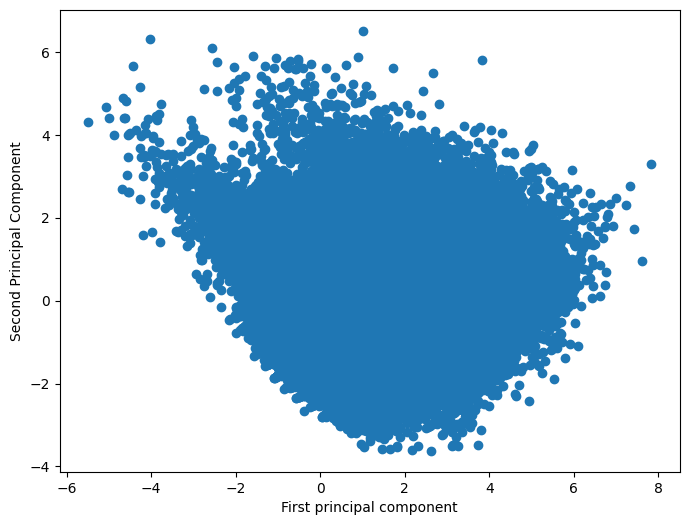

In [21]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],cmap='rainbow')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

In [22]:
print("explained variance %",pca.explained_variance_ratio_*100)
print(pca.components_)

explained variance % [27.9202634  22.65757051]
[[ 0.30877478  0.55784291  0.64515486 -0.19558239 -0.37281651]
 [ 0.21050051  0.48144778 -0.07660803  0.76725468  0.35965127]]


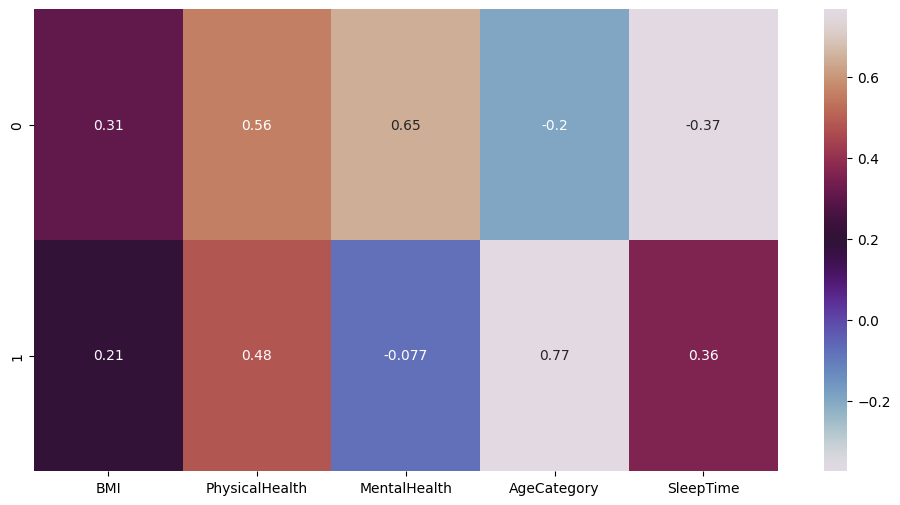

In [23]:
map_df = pd.DataFrame(pca.components_, columns=nums)

# Create the heatmap using seaborn
plt.figure(figsize=(12,6))
sns.heatmap(map_df, cmap='twilight', annot=True)  # 'annot=True' to display the coefficients
plt.show()

**MCA**

In [ ]:
# # Applying MCA
# import prince
# mca = prince.MCA(n_components=2, n_iter=3, random_state=42)
# mca_result = mca.fit(df2[catg]).transform(df2[catg])

# # Convert to DataFrame for easier handling
# mca_df = pd.DataFrame(mca_result, columns=["MCA1", "MCA2"])

# print(mca_df)

In [ ]:
# map_df2 = pd.DataFrame(pca.components_, columns=catg)

# # Create the heatmap using seaborn
# plt.figure(figsize=(12,6))
# sns.heatmap(map_df2, cmap='twilight', annot=True)  # 'annot=True' to display the coefficients
# plt.show()

In [27]:
df2[catg] = df2[catg].apply(LabelEncoder().fit_transform)

In [28]:
df2.head()

HeartDisease   BMI  Smoking  AlcoholDrinking  Stroke  PhysicalHealth  \
0             0   223        1                0       0               3   
1             0   524        0                0       1               0   
2             0  1103        1                0       0              20   
3             0   883        0                0       0               0   
4             0   837        0                0       0              28   

   MentalHealth  DiffWalking  Sex AgeCategory   Race  Diabetic  \
0          30.0            0    0          55  White         2   
1           0.0            0    0          80  White         0   
2          30.0            0    1          65  White         2   
3           0.0            0    0          75  White         0   
4           0.0            1    0          40  White         0   

   PhysicalActivity  GenHealth  SleepTime  Asthma  KidneyDisease  SkinCancer  
0                 1          4        5.0       1              0           1  
1                 1          4        7.0       0              0           0  
2                 1          1        8.0       1              0           0  
3                 0          2        6.0       0              0           1  
4                 1          4        8.0       0              0           0

In [29]:
df.head()

HeartDisease    BMI Smoking AlcoholDrinking Stroke  PhysicalHealth  \
0           No  16.60     Yes              No     No             3.0   
1           No  20.34      No              No    Yes             0.0   
2           No  26.58     Yes              No     No            20.0   
3           No  24.21      No              No     No             0.0   
4           No  23.71      No              No     No            28.0   

   MentalHealth DiffWalking     Sex  AgeCategory   Race Diabetic  \
0          30.0          No  Female        55-59  White      Yes   
1           0.0          No  Female  80 or older  White       No   
2          30.0          No    Male        65-69  White      Yes   
3           0.0          No  Female        75-79  White       No   
4           0.0         Yes  Female        40-44  White       No   

  PhysicalActivity  GenHealth  SleepTime Asthma KidneyDisease SkinCancer  
0              Yes  Very good        5.0    Yes            No        Yes  
1              Yes  Very good        7.0     No            No         No  
2              Yes       Fair        8.0    Yes            No         No  
3               No       Good        6.0     No            No        Yes  
4              Yes  Very good        8.0     No            No         No

**SMOTE**

In [36]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Assuming df2 is your DataFrame
x = df2.drop('HeartDisease', axis=1)[['Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex', 'AgeCategory', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'Asthma', 'KidneyDisease', 'SkinCancer', 'BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime']].values
y = df2['HeartDisease'].values

In [37]:
sm = SMOTE(random_state=42)
X, Y = sm.fit_resample(x, y)

In [38]:
x_train_sm,x_test_sm,y_train_sm,y_test_sm = train_test_split(X,Y,test_size=0.30,random_state=42)

**Random Oversampling**

In [39]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler

# Initialize the RandomOverSampler object
ros = RandomOverSampler(random_state=42)

# Resample the dataset
X_resampled, Y_resampled = ros.fit_resample(x, y)

# Split the resampled dataset into training and testing sets
x_train_os, x_test_os, y_train_os, y_test_os = train_test_split(X_resampled, Y_resampled, test_size=0.30, random_state=42)

**Random Undersampling**

In [40]:
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler

# Initialize the RandomUnderSampler object
rus = RandomUnderSampler(random_state=42)

# Resample the dataset
X_resampled, Y_resampled = rus.fit_resample(x, y)

# Split the resampled dataset into training and testing sets
x_train_us, x_test_us, y_train_us, y_test_us = train_test_split(X_resampled, Y_resampled, test_size=0.30, random_state=42)

**To Check Wheter the Class is balance or not **

In [41]:
Y.mean()

0.5

In [43]:
df2 = df2.drop('Race', axis=1)

The above Value tells us that the the Target Variable is balanced now

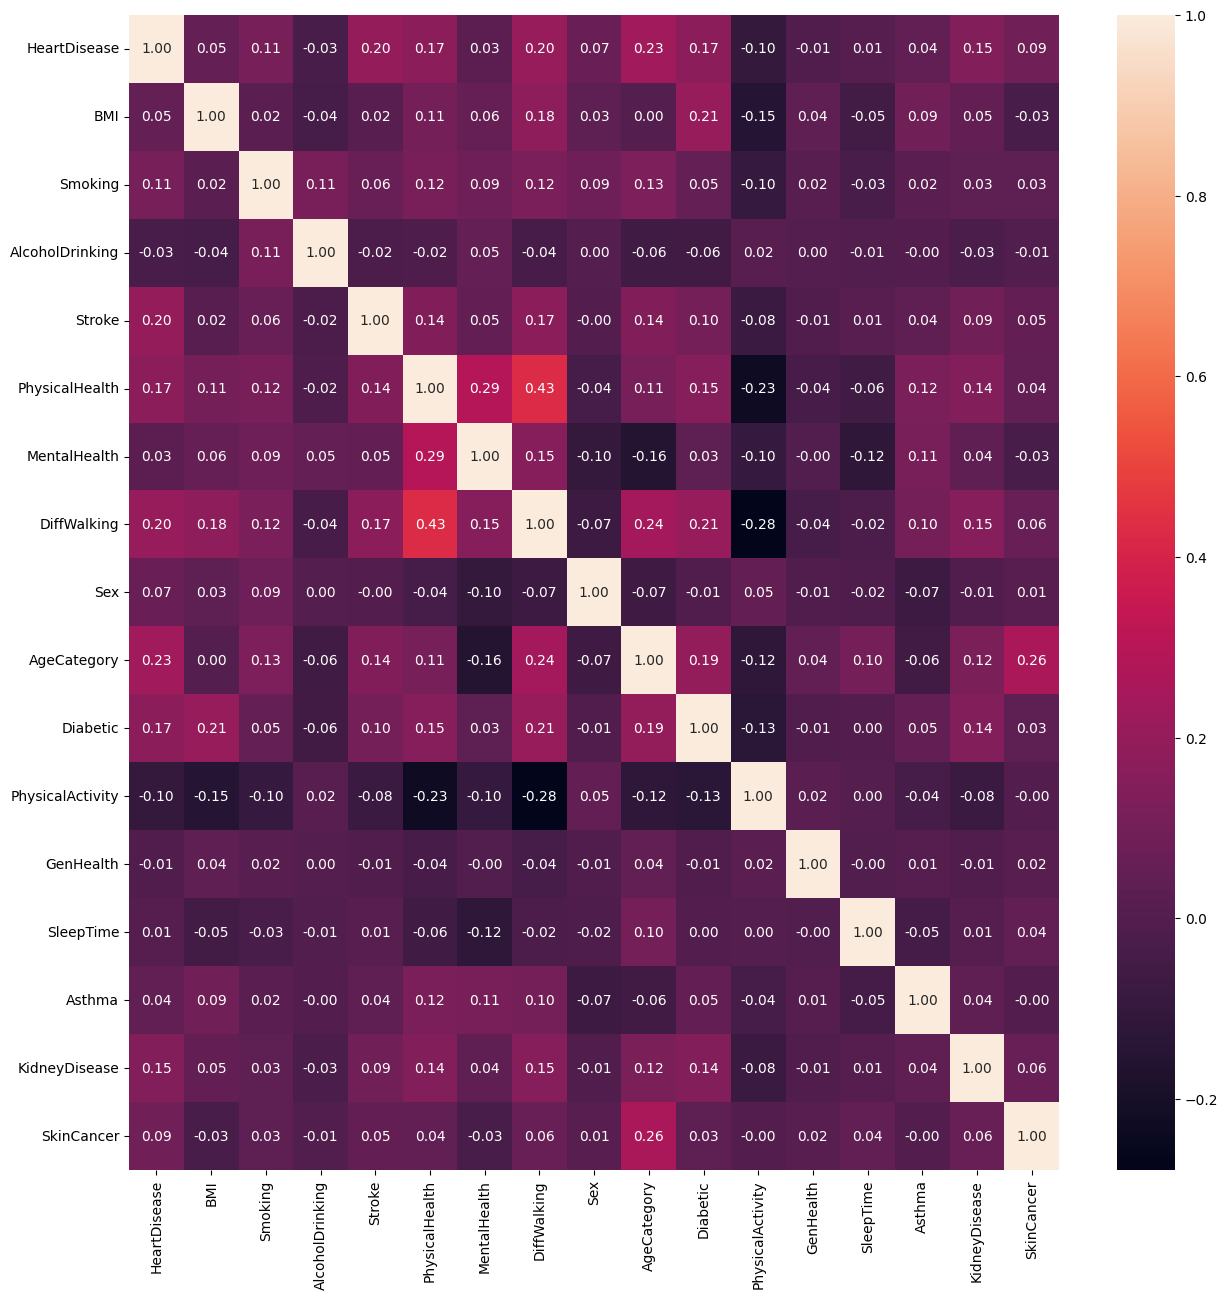

In [44]:
plt.figure(figsize= (15,15))
sns.heatmap(df2.corr(), annot = True ,fmt='0.2f')
plt.show()

**XGBoost**

In [45]:
from xgboost import XGBClassifier

In [46]:
xgb = XGBClassifier(n_estimators= 550 , max_depth= 3 , learning_rate = 0.2)

In [47]:
xgb.fit(x_train_sm , y_train_sm);

In [48]:
print("XGBoost with SMOTE")
print (xgb.score(x_train_sm , y_train_sm))
print (xgb.score(x_test_sm , y_test_sm))

XGBoost with SMOTE
0.9520872517648208
0.9502604671309859


In [49]:
xgb.fit(x_train_os , y_train_os);

In [50]:
print("XGBoost with Random Over Sampling")
print (xgb.score(x_train_os , y_train_os))
print (xgb.score(x_test_os , y_test_os))

XGBoost with Random Over Sampling
0.773372578714673
0.7712106877016198


In [51]:
xgb.fit(x_train_us , y_train_us);

In [52]:
print("XGBoost with Random Under Sampling")
print (xgb.score(x_train_us , y_train_us))
print (xgb.score(x_test_us , y_test_us))

XGBoost with Random Under Sampling
0.7827357653567142
0.7605942523136873


In [53]:
from sklearn.metrics import classification_report

**SMOTE Performance**

In [54]:
print(classification_report(y_test_sm,xgb.predict(x_test_sm)))

              precision    recall  f1-score   support

           0       0.72      0.73      0.73     87576
           1       0.73      0.71      0.72     87878

    accuracy                           0.72    175454
   macro avg       0.72      0.72      0.72    175454
weighted avg       0.72      0.72      0.72    175454



**Over Sampling Performace**

In [55]:
print(classification_report(y_test_os,xgb.predict(x_test_os)))

              precision    recall  f1-score   support

           0       0.79      0.73      0.76     87576
           1       0.75      0.80      0.78     87878

    accuracy                           0.77    175454
   macro avg       0.77      0.77      0.77    175454
weighted avg       0.77      0.77      0.77    175454



**Under Sampling Performance**

In [56]:
print(classification_report(y_test_us,xgb.predict(x_test_us)))

              precision    recall  f1-score   support

           0       0.77      0.74      0.75      8195
           1       0.75      0.78      0.77      8229

    accuracy                           0.76     16424
   macro avg       0.76      0.76      0.76     16424
weighted avg       0.76      0.76      0.76     16424



In [57]:
from sklearn import metrics
plt.figure()
models = [{
    'label': 'XGBoost',
    'model': xgb,
    }
]

<Figure size 640x480 with 0 Axes>

**AUC for XBG using SMOTE **

In [58]:
from sklearn.metrics import roc_auc_score

# Assuming xgb is your trained model and X_test, y_test are your test data and labels
probabilities = xgb.predict_proba(x_test_sm)[:, 1]  # Get probabilities of the positive class
auc_score_sm = roc_auc_score(y_test_sm, probabilities)  # Calculate AUC

print(f"AUC for SMOTE: {auc_score_sm}")

AUC for SMOTE: 0.7942515152066465


**AUC for XGB using Over Sampling**

In [59]:
from sklearn.metrics import roc_auc_score

# Assuming xgb is your trained model and X_test, y_test are your test data and labels
probabilities = xgb.predict_proba(x_test_os)[:, 1]  # Get probabilities of the positive class
auc_score_os = roc_auc_score(y_test_os, probabilities)  # Calculate AUC

print(f"AUC for Over sampling: {auc_score_os}")

AUC for Over sampling: 0.8456376450055691


**AUC for XGB using Under Sampling**

In [60]:
from sklearn.metrics import roc_auc_score

# Assuming xgb is your trained model and X_test, y_test are your test data and labels
probabilities = xgb.predict_proba(x_test_us)[:, 1]  # Get probabilities of the positive class
auc_score_us = roc_auc_score(y_test_us, probabilities)  # Calculate AUC

print(f"AUC for Under Sampling: {auc_score_us}")

AUC for Under Sampling: 0.8374920434591544


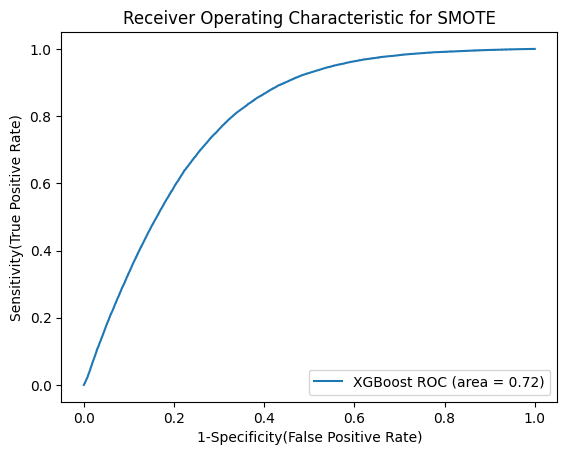

In [61]:
for m in models:
    model = m['model']
    y_pred=model.predict(x_test_sm)
        # Compute False postive rate, and True positive rate
    fpr, tpr, thresholds = metrics.roc_curve(y_test_sm, model.predict_proba(x_test_sm)[:,1])
        # Calculate Area under the curve to display on the plot
    auc = metrics.roc_auc_score(y_test_sm,model.predict(x_test_sm))
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (m['label'], auc))
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic for SMOTE')
plt.legend(loc="lower right")
plt.show()

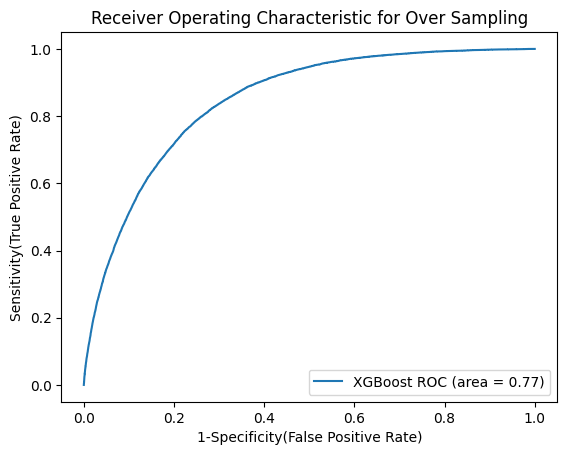

In [62]:
for m in models:
    model = m['model']
    y_pred=model.predict(x_test_os)
        # Compute False postive rate, and True positive rate
    fpr, tpr, thresholds = metrics.roc_curve(y_test_os, model.predict_proba(x_test_os)[:,1])
        # Calculate Area under the curve to display on the plot
    auc = metrics.roc_auc_score(y_test_os,model.predict(x_test_os))
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (m['label'], auc))
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic for Over Sampling')
plt.legend(loc="lower right")
plt.show()

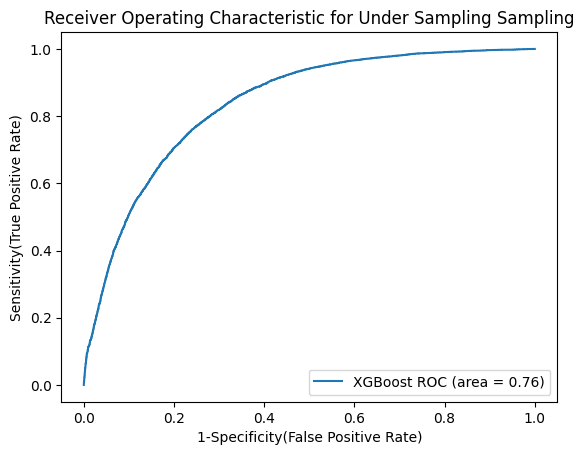

In [63]:
for m in models:
    model = m['model']
    y_pred=model.predict(x_test_us)
        # Compute False postive rate, and True positive rate
    fpr, tpr, thresholds = metrics.roc_curve(y_test_us, model.predict_proba(x_test_us)[:,1])
        # Calculate Area under the curve to display on the plot
    auc = metrics.roc_auc_score(y_test_us,model.predict(x_test_us))
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (m['label'], auc))
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic for Under Sampling Sampling')
plt.legend(loc="lower right")
plt.show()